# PID Controller Simulation
## Let's play with PIDs
We're going to take a look at simulating some PID control algorithms using the matplotlib library. Hopefully this document will be helpful for anyone else looking to experiment with PID algorithms. 

First, we'll import some libraries we'll be working with. You'll need to have these libraries installed in your workspace (I'm using a conda environment, but if you have jupyter installed, you should already have matplotlib). 

In [1]:
import matplotlib
# for plotting graphs
import matplotlib.pyplot as plt
# for plotting images
import matplotlib.image as mpimg

%matplotlib inline

# for working with array-like data structures
import numpy as np

## PID Controller block diagram
Below you'll see a block diagram for a full PID controller. We'll build our PID controller on block at a time, starting with the simplest case. (It's probably better just to open the file from the directory)

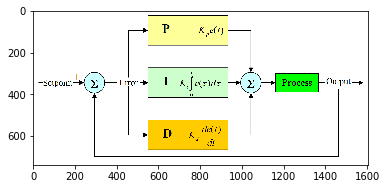

In [2]:
# Define our PID controller example image, read the file, and plot it.
filename = 'pid_controller_example.png'

image = mpimg.imread(filename)
plt.imshow(image)
plt.show()

# P Controller
We'll start with the simplest case: a controller that simply looks at the error present between a desired point (the set value SV) and where we're currently at (the present value, PV).

This is written as a function, so we can play around with different values for Kp, and the time step.

In [3]:
def pController(pv_, sv_, Kp_, timeStep_):
    # Let's say we have a temperature controller that's trying to freeze some ice cubes, but just barely. 
    # Our freezer is currently at room temperature (23 C), so we'll cool it by setting the temperature value to 0 C.

    # Our initial present value (redundant, but for good reason) is stored in a list first, but we'll put it in a numpy
    # array later
    # We'll be adding values to this array for graphing reasons later as we run our controller. 
    pv = [pv_]
    sv = sv_

    # We'll set the value for how aggressive our P-Controller is here
    Kp = Kp_

    # We're only going to give our temperature controller a limited time frame, because we're going to plot this data
    # First we determine what the time step of our simulation is going to be.
    timeStep = timeStep_
    # Then we determine the time interval we're interested in looking at (how long the sim runs). Assume seconds.
    timeInterval = 10
    # This means we'll have (timeInterval / timeStep) number of measurements to graph
    totalTimeSteps = int(timeInterval/timeStep)

    # Now we define a numpy array for storing our time sequences
    # data = [listOfTime, listOfPV]
    data = np.zeros((totalTimeSteps,2))

    # Now we implement the proportional controller
    # We'll loop through all the possible time steps in our time interval
    for time in range(0,totalTimeSteps):
        # Calculate the "controller error" at this time step.
        controllerError = sv - pv[time]
        # Now find the "controller output" 
        controllerOutput = Kp*controllerError
        # In the simplest case, our controller makes the adjustment immediately. 
        pv.append(pv[time] + controllerOutput)
        data[time,0] = time*timeStep
        data[time, 1] = pv[time+1]

    # print(data)

    # Now we'll plot the data using plt.plot(xValues, yValues)
    # Then call plt.show() to take a look
    plt.plot(data[:,0],data[:,1])
    plt.show()

## Different Parameters, Different Results
We'll try different parameters for our simulation and see what happens

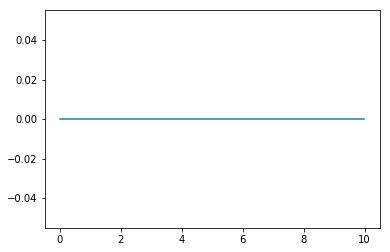

In [4]:
# pController(pv_, sv_, Kp_, timeStep_)
# We use Kp = 1 in this instance
pController(23, 0, 1, 0.01)

Our PID controller is instantly at temp. That's great, but pretty ideal. 

Let's see what happens when Kp = 1.8

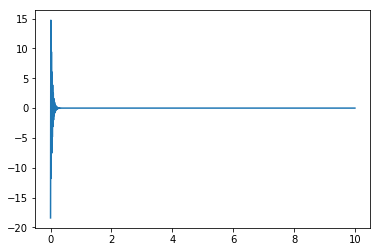

In [5]:
# pController(pv_, sv_, Kp_, timeStep_)
# We use Kp = 1 in this instance
pController(23, 0, 1.8, 0.01)

We can see a small transient signal at the very beginning (maybe 300us?). 
What happens when our Kp value gets close to 2 (say, Kp=1.99)?

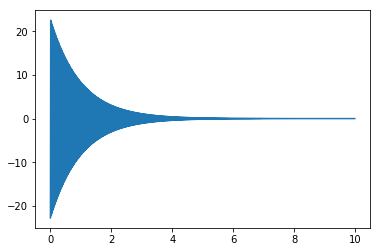

In [6]:
# pController(pv_, sv_, Kp_, timeStep_)
# We use Kp = 1 in this instance
pController(23, 0, 1.99, 0.01)

You can see that the pController spends a lot more time "hunting" for the proper set value, settling after about 4 seconds. What happens when Kp = 2? 

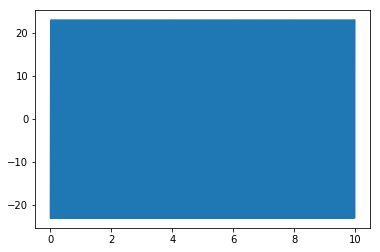

In [7]:
# pController(pv_, sv_, Kp_, timeStep_)
# We use Kp = 1 in this instance
pController(23, 0, 2, 0.01)

Madness. Our pController isn't able to settle down to our set value, and instead spends the entire 10 seconds hunting for it. I haven't written the pController function to let us zoom in on a specific time interval for closer inspection, but feel free to do this yourself to investigate further!

This might be in part to some error that accumulates over time intervals due to the discreteness of our simulation(there are other methods for minimizing error in simulations, like higher-order Runge-Kutta methods). But let's first take a look at when we have a variable set value (as happens in actual systems that need to move and do things). 

We'll redefine the pController method to act on a predetermined range of set values (contained in a list). This new method will only require the initial present value, and a value for our Kp. 

In [8]:
def newPController(pv_, Kp_):
    # Let's say we have a temperature controller that's trying to freeze some ice cubes, but just barely. 
    # Our freezer is currently at room temperature (23 C), so we'll cool it by setting the temperature value to 0 C.

    # Our initial present value (redundant, but for good reason) is stored in a list first, but we'll put it in a numpy
    # array later
    # We'll be adding values to this array for graphing reasons later as we run our controller. 
    pv = [pv_]
    sv = []
    
    # Our timeStep is 0.01 in a timeInterval of 10seconds, giving us 1,000 points to have a set value for
    for i in range(0,1000):
        sv.append(0)
        
    # We're going to place a jump for our set value back to 23 degrees at 2.5 seconds (the 249th point in the sv list)
    # and have the temperature return back to 0 degrees around 7.5 seconds.
    for i in range(249,750):
        sv[i] = 23

    # We'll set the value for how aggressive our P-Controller is here
    Kp = Kp_

    # We're only going to give our temperature controller a limited time frame, because we're going to plot this data
    # First we determine what the time step of our simulation is going to be.
    timeStep = 0.01
    # Then we determine the time interval we're interested in looking at (how long the sim runs). Assume seconds.
    timeInterval = 10
    # This means we'll have (timeInterval / timeStep) number of measurements to graph
    totalTimeSteps = int(timeInterval/timeStep)

    # Now we define a numpy array for storing our time sequences
    # data = [listOfTime, listOfPV]
    data = np.zeros((totalTimeSteps,2))

    # Now we implement the proportional controller
    # We'll loop through all the possible time steps in our time interval
    for time in range(0,totalTimeSteps):
        # Calculate the "controller error" at this time step.
        controllerError = sv[time] - pv[time]
        # Now find the "controller output" 
        controllerOutput = Kp*controllerError
        # In the simplest case, our controller makes the adjustment immediately. 
        pv.append(pv[time] + controllerOutput)
        data[time,0] = time*timeStep
        data[time, 1] = pv[time+1]

    # print(data)

    # Now we'll plot the data using plt.plot(xValues, yValues)
    # Then call plt.show() to take a look
    plt.plot(data[:,0],data[:,1])
    plt.show()

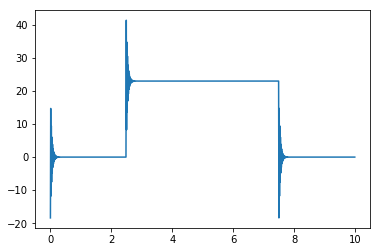

In [9]:
# Running our new function, we get (for Kp = 1.8)
newPController(23,1.8)

The results are similar -- for a large Kp value, we get massive spikes before our temperature settles to its desired point. This can be disastrous for control systems though, since we can accidentally go well under (or over) our desired setpoint, resulting in freeze-dried or boiled food!

Let's try our pController with smalle Kp value. Like Kp = 0.8, 0.1, 0.01

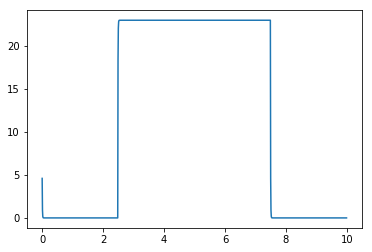

In [10]:
# Running the newPController with Kp = 0.8
newPController(23,0.8)

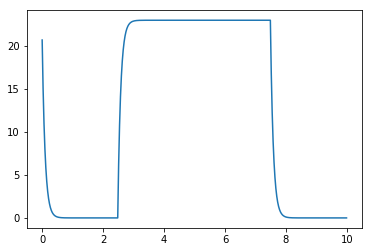

In [11]:
# Running the newPController with Kp = 0.5
newPController(23,0.1)

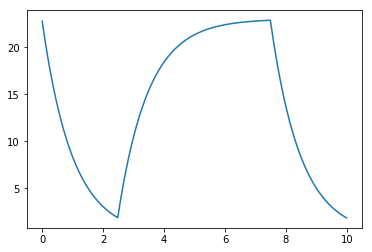

In [12]:
# Running the newPController with Kp = 0.5
newPController(23,0.01)

You can see that for smaller values of Kp, it takes our controller longer to get the freezer to reach our set temperature. 

# PI Controller
## Adding an integral term for better control. 
Now we're going to add an integrating term into our controller. An integral term essentially allows us to keep track of the error we've accumulated over a time interval (hence the integration). 

In [13]:
## TODO 
## -> Figure out how to show the offset value that can occur with a PController in simulation
## -> Write the simulation for the PI Controller
## -> Compare the results of the P Controller with that of the PI Controller 
## -> Move on to PID Controller
## -> Eventually get to topic of tuning P-I-D parameters for P,PI,PD,PID Controllers.